# Project Telco Customer Churning Analysis

Project Idea:

- Predict customer churn using classification techniques like logistic regression or random forests.
- Perform feature engineering to understand which customer attributes (e.g., contract length, payment method) influence churn the most.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [150]:
#pd.reset_option('display.max_columns')
pd.set_option('display.max_columns', None)

## Loading and Overview of Data

In [4]:
pd.read_csv('archive/CustomerChurn.csv')

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,810338,6840-RESVB,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,230811,2234-XADUH,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,155157,4801-JZAZL,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,731782,8361-LTMKD,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df = pd.read_csv('archive/Telco_customer_churn.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [6]:
df.shape

(7043, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## Data Cleaning

In [21]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
df['Churn Reason'].isnull().value_counts()

Churn Reason
True     5174
False    1869
Name: count, dtype: int64

In [18]:
df['Churn Reason'].sample(10)

3429                             NaN
6950                             NaN
740          Product dissatisfaction
6645                             NaN
5665                             NaN
6891                             NaN
3267                             NaN
307     Attitude of service provider
4524                             NaN
2418                             NaN
Name: Churn Reason, dtype: object

In [25]:
df['Total Charges'].isnull().sum()

# No rows with missing values for the column
# If missing values existed, then use
# df.dropna(subset=['Total Charges'], inplace = True)
# Drops rows with missing values

0

In [30]:
# dtype is object
df['Total Charges'].sample(5)

2537    8310.55
6880     3801.7
644      5149.5
975        38.7
3105    1431.65
Name: Total Charges, dtype: object

In [34]:
# Convert col from object to float
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors = 'coerce')

In [35]:
df['Total Charges'].sample(5)

4948    1226.45
6381    2020.90
6641    6640.70
3416     980.35
2194    1183.80
Name: Total Charges, dtype: float64

## Explortatory Data Analysis (EDA)

- Understand Churn Distribution

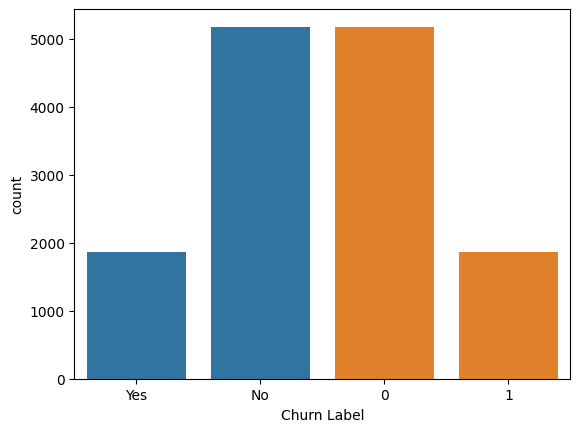

In [40]:
sns.countplot(x= 'Churn Label', data=df)
sns.countplot(x= 'Churn Value', data=df)
plt.show()

Analyze Numeric and Categorical Features

In [45]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Visualize Feature Relationships

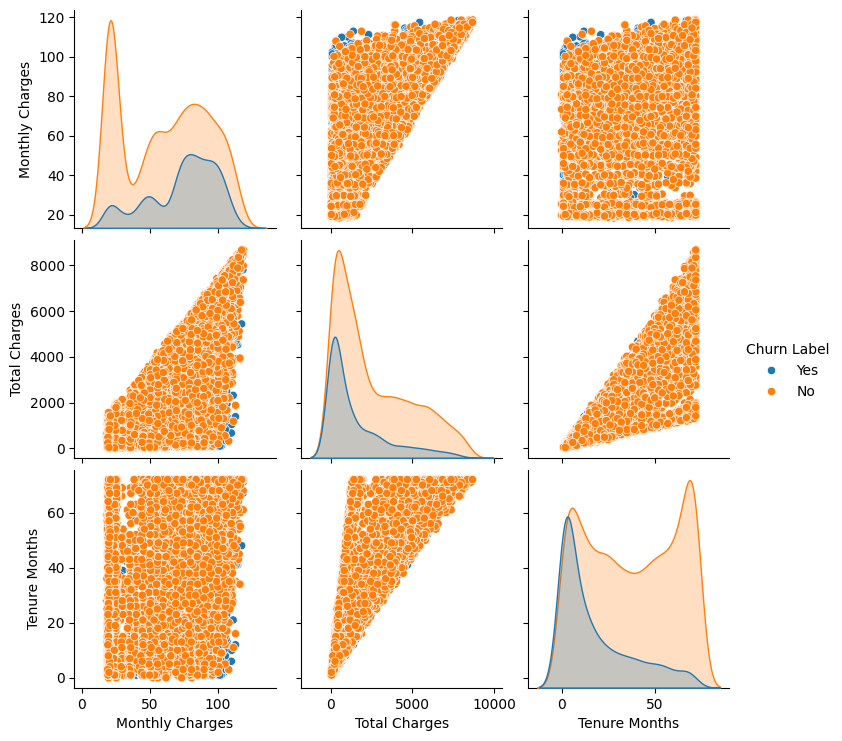

In [52]:
sns.pairplot(df[['Monthly Charges','Total Charges', 'Tenure Months', 'Churn Label']], hue = 'Churn Label')
plt.show()

## Feature Engineering

**Encoding Categorical Variables:**

Convert categorical variables into numerical values usig Label Encoding or One-Hot Encoding

In [133]:
df_one_encoding = pd.get_dummies(df, columns = ['Contract', 'Payment Method', 'Internet Service'], drop_first = True)

In [136]:
df_one_encoding

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Churn Score,CLTV,Churn Reason,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_Fiber optic,Internet Service_No
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,86,3239,Competitor made better offer,False,False,False,False,True,False,False
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,67,2701,Moved,False,False,False,True,False,True,False
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,86,5372,Moved,False,False,False,True,False,True,False
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,84,5003,Moved,False,False,False,True,False,True,False
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,89,5340,Competitor had better devices,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,45,5306,NaN,False,True,False,False,False,False,True
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,59,2140,NaN,True,False,False,False,True,False,False
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,71,5560,NaN,True,False,True,False,False,True,False
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,59,2793,NaN,False,False,False,True,False,False,False


**Feature Scaling:**

Standardize or normalize features, especially for algorithms like logistic regression

In [137]:
scaler = StandardScaler()
df_one_encoding[['Monthly Charges', 'Total Charges']] = scaler.fit_transform(df_one_encoding[['Monthly Charges', 'Total Charges']])

In [138]:
df_one_encoding[['Monthly Charges','Total Charges']].sample(5)

,Monthly Charges,Total Charges
4838,0.661007,1.500170
267,0.488180,0.321956
3055,1.555053,1.516383
1432,0.159144,-0.976679
4559,-1.321517,-0.564257


## Train-Test Split

In [139]:
df_train = df_one_encoding.copy()

In [140]:
df_train

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Churn Score,CLTV,Churn Reason,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_Fiber optic,Internet Service_No
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,86,3239,Competitor made better offer,False,False,False,False,True,False,False
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,67,2701,Moved,False,False,False,True,False,True,False
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,86,5372,Moved,False,False,False,True,False,True,False
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,84,5003,Moved,False,False,False,True,False,True,False
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,89,5340,Competitor had better devices,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,45,5306,NaN,False,True,False,False,False,False,True
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,59,2140,NaN,True,False,False,False,True,False,False
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,71,5560,NaN,True,False,True,False,False,True,False
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,59,2793,NaN,False,False,False,True,False,False,False


In [141]:
X = df_train.drop('Churn Label', axis = 1)
y = df_train['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

Column 'Churn Values' is alread the binary encoding of the column 'Churn Label'

Split into training and sets:

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

- Logistic Regression

In [144]:
X_train.drop(columns=['CustomerID'], inplace=True)
X_test.drop(columns=['CustomerID'], inplace=True)

In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1695 to 860
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Count                                   4930 non-null   int64  
 1   Country                                 4930 non-null   object 
 2   State                                   4930 non-null   object 
 3   City                                    4930 non-null   object 
 4   Zip Code                                4930 non-null   int64  
 5   Lat Long                                4930 non-null   object 
 6   Latitude                                4930 non-null   float64
 7   Longitude                               4930 non-null   float64
 8   Gender                                  4930 non-null   object 
 9   Senior Citizen                          4930 non-null   object 
 10  Partner                                 4930 non-null   object 

In [145]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ValueError: could not convert string to float: 'United States'